In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from scipy import stats 
from sklearn.datasets.samples_generator import make_regression

In [2]:
def compute_cost(X, y, theta):
    m = y.size
    prediction = X.dot(theta.T)
    error = np.power((prediction - y), 2)
    cost = np.sum(error) / (2 * m)
    return cost

In [3]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost = np.zeros(shape=iterations)
    number_of_features = theta.size
    for i in range(iterations):
        prediction = X.dot(theta.T)
        error = prediction - y
        for j in range(number_of_features):
            temp = np.multiply(error, X[:, j])
            theta[0, j] = theta[0, j] - ((learning_rate / len(X)) * np.sum(temp))
        cost[i] = compute_cost(X, y, theta)
    return theta, cost

In [4]:
def plot_graph(iterations, cost):
    iteration = np.matrix([i for i in range(iterations)])
    plt.plot(iteration.T, cost)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Error vs Training')
    plt.show()

In [12]:
def mean_absolute_error(predictions, real_values):
    output_errors = np.average(np.abs(predictions - real_values))
    return output_errors

In [5]:
data_train = pd.read_csv("data/train.csv")
data_test = pd.read_csv("data/test.csv")

important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']
important_features_test = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

data_set = data_train[important_features].copy()
data_set_test = data_test[important_features_test].copy()

In [6]:
# Find out which columns have null values
null_columns = data_set_test.columns[data_set_test.isnull().any(axis=0)]
# Find total count of those columns appeared as null in the set
null_list = data_set_test[null_columns].isnull().sum().sort_values(ascending=False)
# print("Missing Attributes: {0}".format(null_list))
data_set_test.loc[data_set_test['TotalBsmtSF'].isnull(), 'TotalBsmtSF'] = 0
data_set_test.loc[data_set_test['GarageCars'].isnull(), 'GarageCars'] = 0

In [7]:
# Target Variable
y = data_set['SalePrice']
y = np.matrix(y).T

# Features
X = data_set.drop(columns='SalePrice')
X = (X - X.mean()) / X.std()
X.insert(0, "Intercept", 1)
X = np.matrix(X)

# Test Set
X_test = data_set_test
X_test = (X_test - X_test.mean()) / X_test.std()
X_test.insert(0, "Intercept", 1)
X_test = np.matrix(X_test)

In [8]:
# Initial Thetas
theta = np.matrix(np.zeros(shape=X.shape[1]))
# Parameters
learning_rate = 0.01
iteration = 500


Running Linear Regression On Whole Set


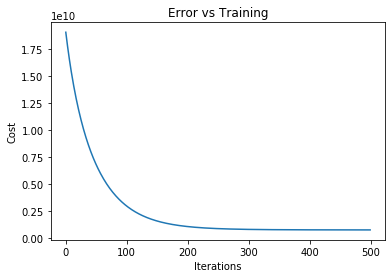

In [9]:
print("\nRunning Linear Regression On Whole Set")
result = gradient_descent(X, y, theta, learning_rate, iteration)
plot_graph(iteration, result[1])

In [14]:
final_predictions = X.dot(result[0].T)
mae = mean_absolute_error(final_predictions, y)
print("Mean Absolute Error: {0}".format(mae))

Mean Absolute Error: 24520.41694534427


In [15]:
prediction_of_test_set = X_test.dot(result[0].T)
prediction_df = pd.DataFrame(prediction_of_test_set)
prediction_df.columns = ['SalePrice']

In [18]:
df_submission = pd.concat([data_test['Id'], prediction_df], axis=1)
df_submission.to_csv('data/Submission.csv', index=False)